# Gradient Descent

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=c36lUUr864M&t=3318s

## Example

Concrete example of how we optimize our model with automatic gradient computation using the PyTorch autograph package. We start by implementing the linear regression algorithm from scratch where we do every step manually, we implement the equations to calculate the model prediction and the loss function.

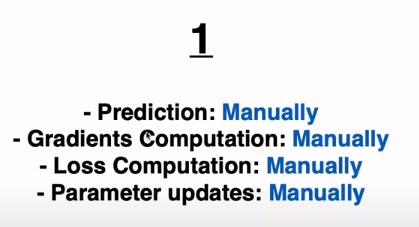

Then we do a numerical computation of the gradients and implement the formula and then we implement the gradient descent algorithm to optimize our parameters. When this is working we see how we can replace the manually computed gradients with the automatic backpropagation algorithm from PyTorch.

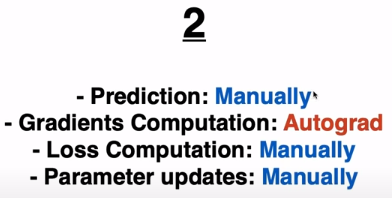

In the third step we replace the manually computed loss and parameter updates by using the loss and optimizer classes in PyTorch.

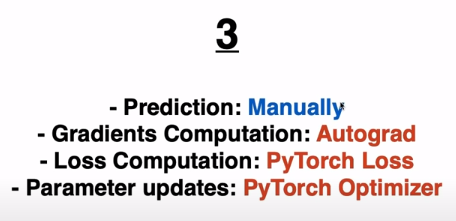

In the final step we replace the manualy computed model prediction by implementing a PyTorch model. When we understood each of the steps PyTorch can do most of the work for us. We still have to design our model and have to know which loss and optimizer we should use, but we don't have to worry about the underlying algorithms anymore. This Notebook based on Patrick Loeber Course will only cover the steps one and two.

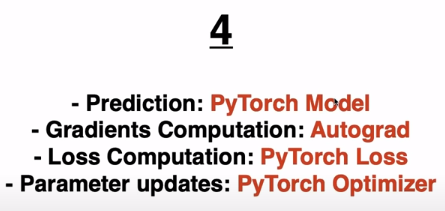

## Linear regression from scratch, simple example

In [5]:
import numpy as np

# f = w * b

# f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
# dl/dw = 1/N 2x (w*x - y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients
    dw = gradient(X, Y, y_pred)
    
    # update weights
    w -= learning_rate * dw
    
    if epoch % 2 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


## Linear regression example with PyTorch 

In [7]:
import torch

# f = w * b

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()


print(f"Prediction before training: f(5) = {forward(5):.3f}")

# training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero gradients 
    w.grad.zero_()
    
    if epoch % 2 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
Prediction after training: f(5) = 9.612


## Difference

The Difference between the two examples comes from the backpropagation which is not as exact as the numerical gradient computation, so we need more iterations.

In [9]:
import torch

# f = w * b

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()


print(f"Prediction before training: f(5) = {forward(5):.3f}")

# training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero gradients 
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000
